# 練習:[EDA] Heatmap & Grid-scatters

In [2]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")
%matplotlib inline

#ignore warning
import warnings
warnings.filterwarnings('ignore')

dir_data = './data/'

In [2]:
f_app = os.path.join(dir_data,'application_train.csv')
app_train = pd.read_csv(f_app)
app_train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [3]:
# 取出 EXT_SOURCE 的幾項變數並檢驗其相關性
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
ext_data = app_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corr = ext_data.corr()
ext_data_corr

TARGET  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  DAYS_BIRTH
TARGET        1.000000     -0.155317     -0.160472     -0.178919   -0.078239
EXT_SOURCE_1 -0.155317      1.000000      0.213982      0.186846    0.600610
EXT_SOURCE_2 -0.160472      0.213982      1.000000      0.109167    0.091996
EXT_SOURCE_3 -0.178919      0.186846      0.109167      1.000000    0.205478
DAYS_BIRTH   -0.078239      0.600610      0.091996      0.205478    1.000000

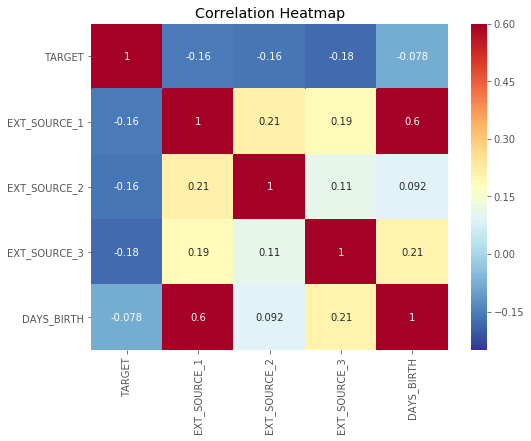

In [16]:
#heatmap
plt.figure(figsize=(8,6))
p1 = sns.heatmap(ext_data_corr, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
#camp:matplotlib的colormap名称或颜色对象
#center:将数据设置为图例中的均值数据(默認為None,數值為vmax跟vmin的中間值)，
        #若設定值(center = 0.45),則圖例中的中間值數值就會變成0.45
#annot : 如果为True，则将数据值写入每个单元格中
#fmt : 表格里显示数据的类型('.0%':百分比;'f':完整數字;'.3'('.3f')显示小数的位数)
#mask:設定布林條件，可以只讓符合條件的格子有顏色
#linewidths
plt.title('Correlation Heatmap')
plt.show()

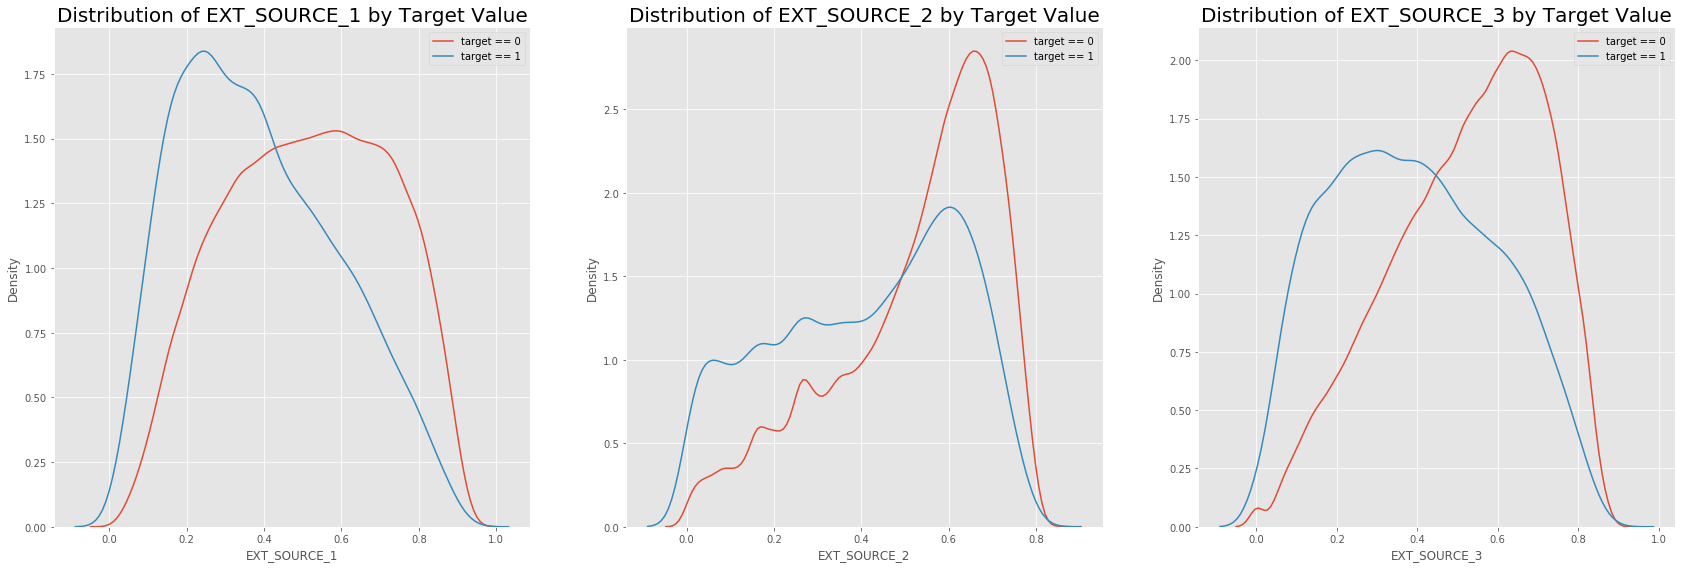

In [24]:
# 進一步我們檢查這三項變數('EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3')在 Target 上的分布是否不同
plt.figure(figsize = (24,8))
#enumerate() 函数用于将一个可遍历的数据对象(如列表、元组或字符串)组合为一个索引序列，同时列出数据和数据下标
#seasons = ['Spring', 'Summer', 'Fall', 'Winter']:enumerate(seasons):(0, 'Spring'), (1, 'Summer'), (2, 'Fall'), (3, 'Winter')
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    plt.subplot(1,3,i+1)
    sns.kdeplot(app_train.loc[app_train['TARGET']==0,source],label ='target == 0')
    sns.kdeplot(app_train.loc[app_train['TARGET']==1,source],label ='target == 1')
    plt.title('Distribution of %s by Target Value'%source,fontsize =20)
    plt.xlabel('%s'%source);plt.ylabel('Density')
plt.tight_layout(h_pad = 10)

In [25]:
plot_data = ext_data.copy()
# 轉成以年記齡後，將以日記齡丟掉
plot_data['YEARS_BIRTH'] = plot_data['DAYS_BIRTH']/365
plot_data.drop(['DAYS_BIRTH'],axis =1,inplace = True)

#定義函數 : 計算兩個 column 之間的相關係數
def corr_func(x,y,**kwargs):
    r = np.corrcoef(x,y)[0][1]
    
    #取得子圖，並對其做出相關係數的註解
    ax = plt.gca()
    #plt.gca():Get the current Axes instance on the current figure matching the given keyword args, or create one.
    #子图(Axes)
    ax.annotate("r={:.2f}".format(r),xy=(.2,.8),xycoords = ax.transAxes,size =20)
    #.annotate:添加註解; xy=(.2,.8)The point (x,y) to annotate; 
    #xycoords=ax.transAxes:The coordinate system that xy is given in
    #(The coordinate system of the Axes; (0,0) is bottom left of the axes, and (1,1) is top right of the axes.)
    #xytext : (float, float)The position (x,y) to place the text at. If None, defaults to xy

# 使用PairGrid進行  "自定義"

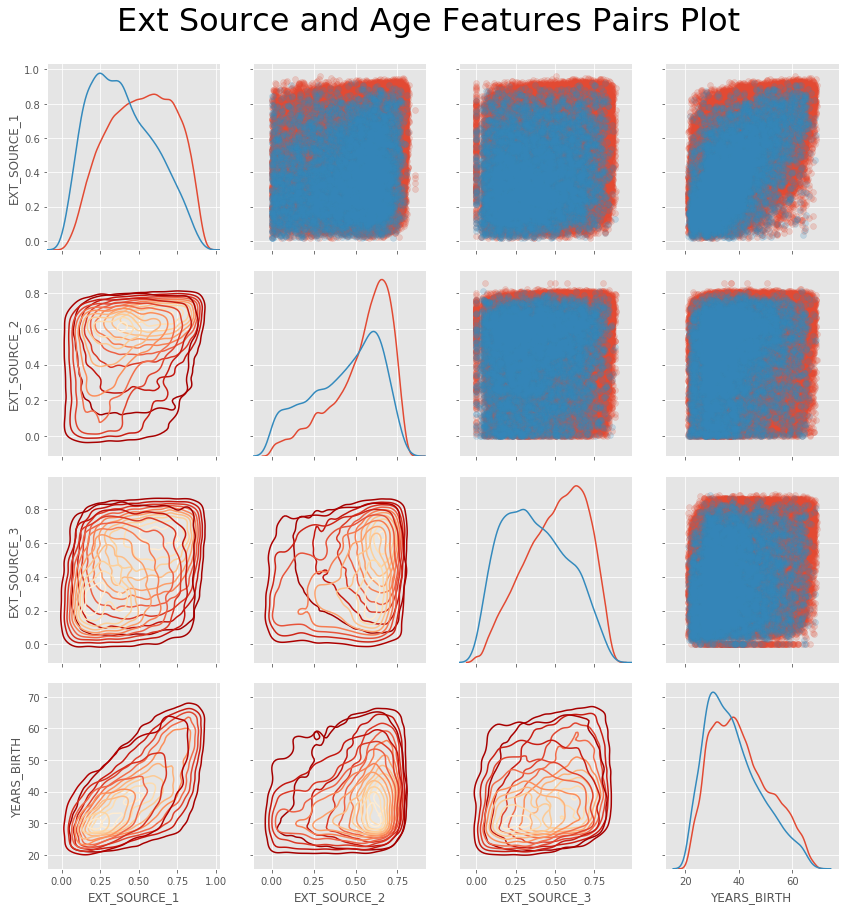

In [29]:
N_sample = 100000
# 把 NaN 數值刪去, 並限制資料上限為 100000 : 因為要畫點圖, 如果點太多，會畫很久!
plot_data = plot_data.dropna().sample(N_sample)
# 建立 pairgrid 物件
grid = sns.PairGrid(data = plot_data, size =3, diag_sharey = False, hue = 'TARGET', 
                   vars = [x for x in list(plot_data.columns) if x != 'TARGET'])
# 上三角形半部為 scatter
grid.map_upper(plt.scatter, alpha = 0.2)
# 對角線畫 kde
grid.map_diag(sns.kdeplot)
# 下半部放 density plot
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r)

plt.suptitle('Ext Source and Age Features Pairs Plot', size = 32, y = 1.05)
plt.show()

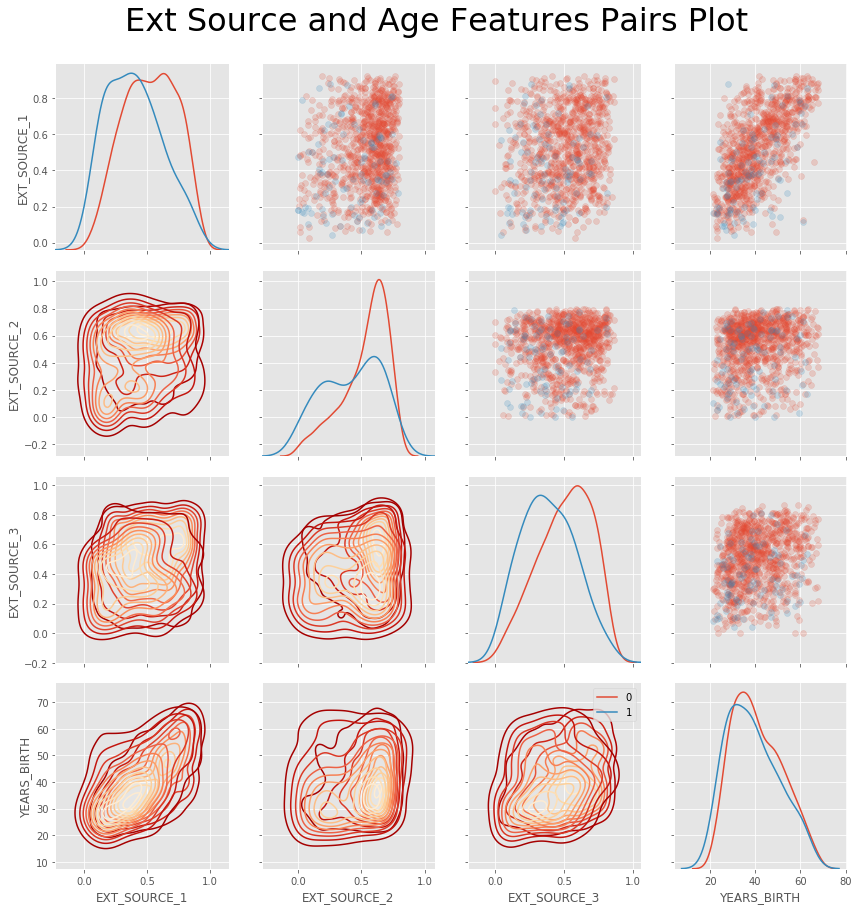

In [31]:
N_sample = 1000
# 調整數量到1000
plot_data = plot_data.dropna().sample(N_sample)
# 建立 pairgrid 物件
grid = sns.PairGrid(data = plot_data, size =3, diag_sharey = False, hue = 'TARGET', 
                   vars = [x for x in list(plot_data.columns) if x != 'TARGET'])
# 上三角形半部為 scatter
grid.map_upper(plt.scatter, alpha = 0.2)
# 對角線畫 kde
grid.map_diag(sns.kdeplot)
# 下半部放 density plot
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r)
plt.legend()
plt.suptitle('Ext Source and Age Features Pairs Plot', size = 32, y = 1.05)
plt.show()

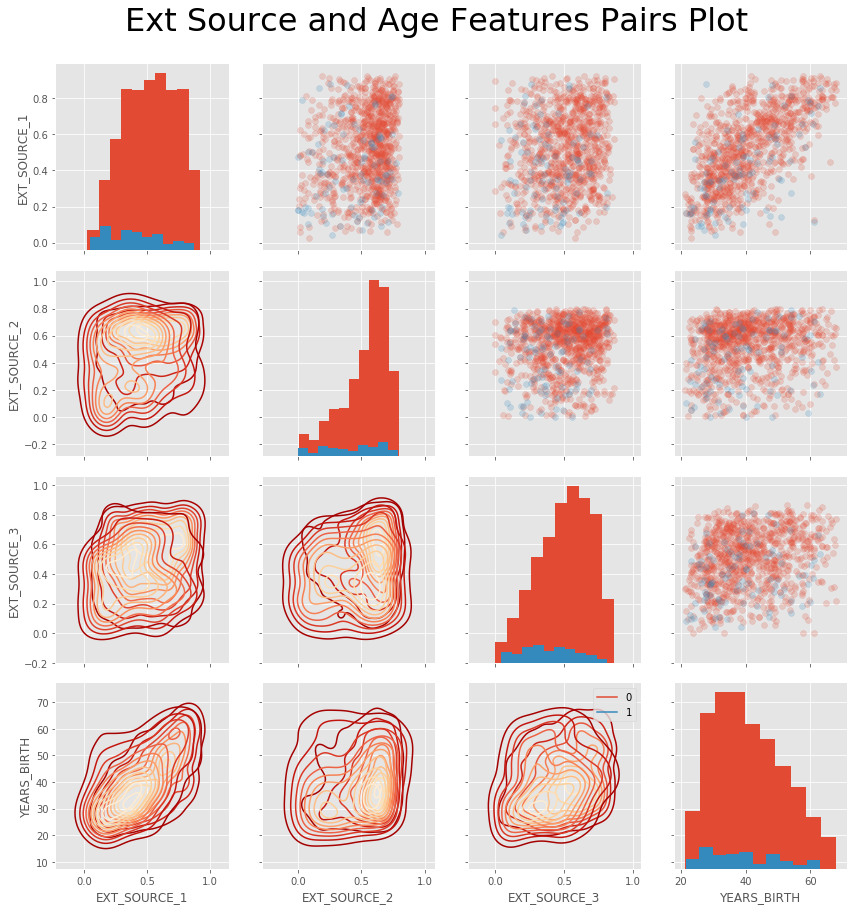

In [33]:
N_sample = 1000
# 調整數量到1000
plot_data = plot_data.dropna().sample(N_sample)
# 建立 pairgrid 物件
grid = sns.PairGrid(data = plot_data, size =3, diag_sharey = False, hue = 'TARGET', 
                   vars = [x for x in list(plot_data.columns) if x != 'TARGET'])
# 上三角形半部為 scatter
grid.map_upper(plt.scatter, alpha = 0.2)
# 對角線畫 hist
grid.map_diag(plt.hist)
# 下半部放 density plot
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r)
plt.legend()
plt.suptitle('Ext Source and Age Features Pairs Plot', size = 32, y = 1.05)
plt.show()

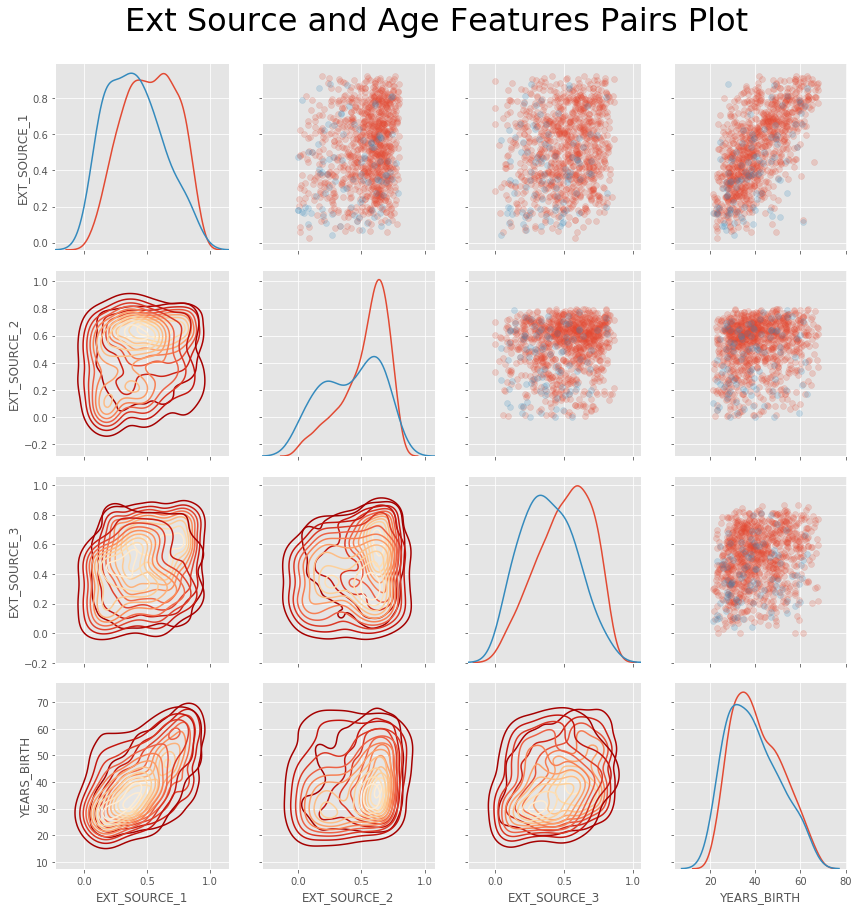

In [36]:
N_sample = 1000
# 調整數量到1000
plot_data = plot_data.dropna().sample(N_sample)
# 建立 pairgrid 物件
grid = sns.PairGrid(data = plot_data, size =3, diag_sharey = False, hue = 'TARGET', 
                   vars = [x for x in list(plot_data.columns) if x != 'TARGET'])
# 上三角形半部為 scatter
grid.map_upper(plt.scatter, alpha = 0.2)
# 對角線畫 kde
grid.map_diag(sns.kdeplot)
# 下半部放 density plot 
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r)


plt.suptitle('Ext Source and Age Features Pairs Plot', size = 32, y = 1.05)
plt.show()

# Seaborn的散點圖矩陣（Pairs Plots）

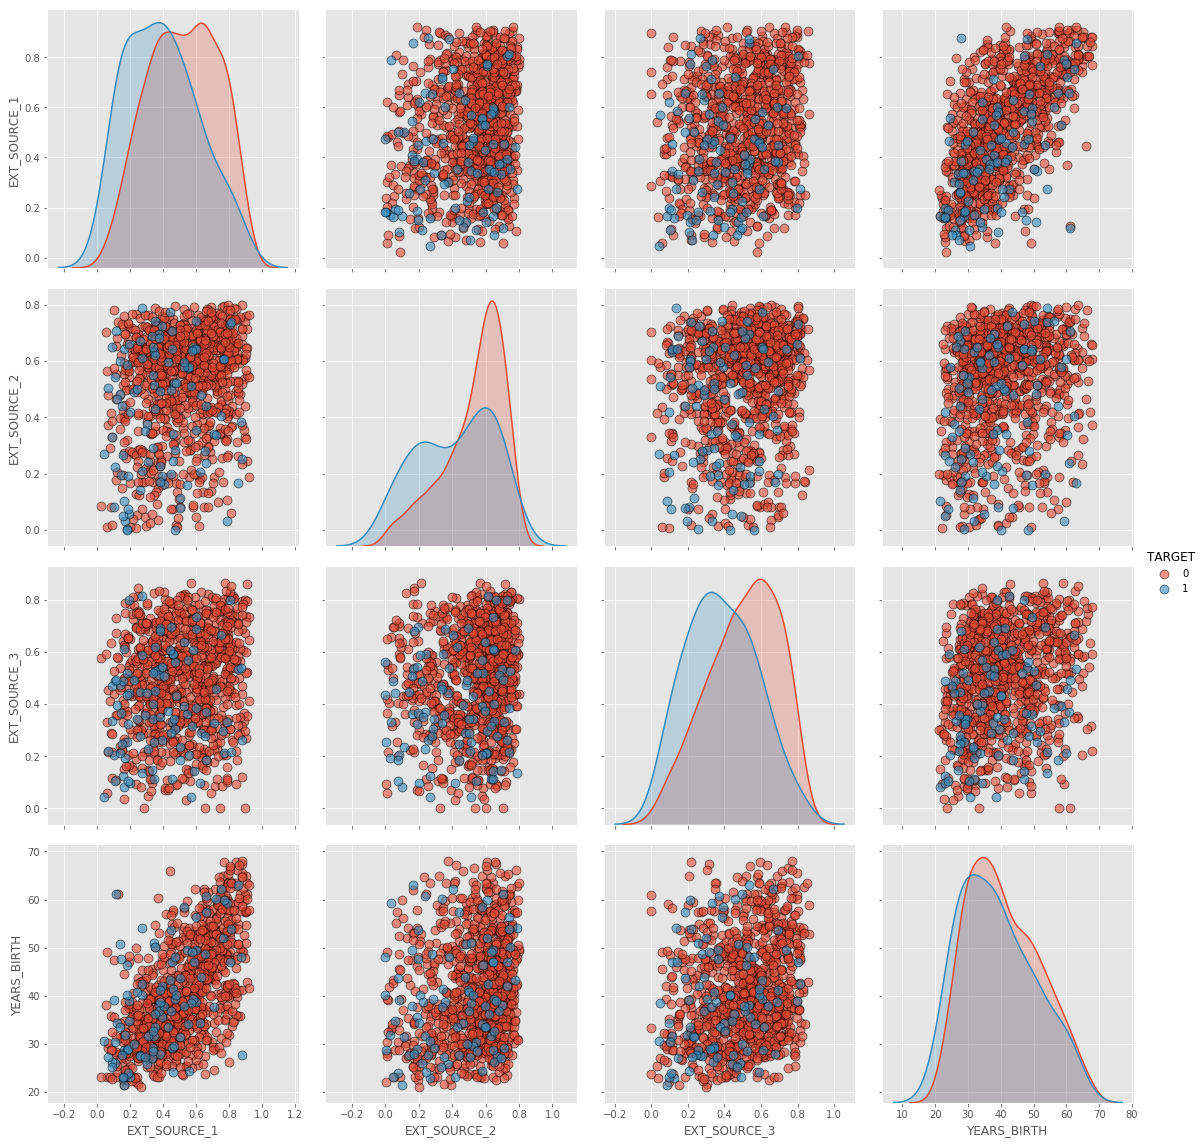

In [38]:
N_sample = 1000
plot_data = plot_data.dropna().sample(N_sample)
sns.pairplot(plot_data, hue = 'TARGET', diag_kind = 'kde',
plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
size = 4,vars = [x for x in list(plot_data.columns) if x != 'TARGET'])

# 作業

1. 請用 numpy 建立一個 10 x 10, 數值分布自 -1.0 ~ 1.0 的矩陣並繪製 Heatmap
2. 請用 numpy 建立一個 1000 x 3, 數值分布為 -1.0 ~ 1.0 的矩陣，並繪製 PairPlot (上半部為 scatter, 對角線為
hist, 下半部為 density)
3. 請用 numpy 建立一個 1000 x 3, 數值分布為常態分佈的矩陣，並繪製 PairPlot (上半部為 scatter, 對角線為 hist, 下半部為 density)

1. 請用 numpy 建立一個 10 x 10, 數值分布自 -1.0 ~ 1.0 的矩陣並繪製 Heatmap

In [4]:
df1 = np.random.uniform(-1,1,size = (10,10))


In [5]:
df1

array([[ 0.73598208, -0.13546943,  0.92052598,  0.56781504, -0.25712877,
         0.81883025,  0.52375575,  0.2826125 , -0.18888114,  0.05711686],
       [-0.51150281, -0.62344045,  0.67610812,  0.09597556,  0.95936174,
         0.13105174, -0.69268155, -0.96326804,  0.99438037,  0.84212311],
       [-0.20196847, -0.8024846 ,  0.70003431,  0.12174623,  0.72391186,
         0.81949669,  0.99985666,  0.78105356,  0.64121609, -0.31427203],
       [-0.953402  ,  0.85761634,  0.27980326,  0.53343011, -0.89905156,
         0.81455354,  0.31775169,  0.68327616,  0.99358333,  0.60284028],
       [-0.16328043,  0.85755479, -0.63279761, -0.86794966,  0.34795398,
         0.9376222 ,  0.83623319, -0.99712401,  0.2256044 , -0.57270452],
       [-0.41251904, -0.85014311, -0.93062704,  0.86901379, -0.95577522,
         0.90763556, -0.55440339,  0.96455071,  0.87117288, -0.90960909],
       [ 0.21810512, -0.54535275, -0.57941245,  0.64435194, -0.545349  ,
        -0.33579607,  0.77856055,  0.73996949

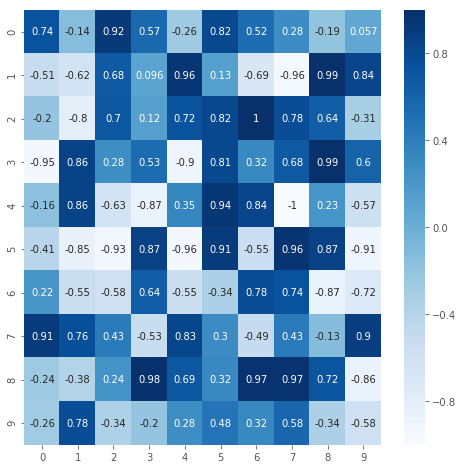

In [11]:
plt.figure(figsize=(8,8))
p1 = sns.heatmap(df1, cmap = plt.cm.Blues, vmin = -1, annot = True, vmax = 1)
plt.show()

2. 請用 numpy 建立一個 1000 x 3, 數值分布為 -1.0 ~ 1.0 的矩陣，並繪製 PairPlot (上半部為 scatter, 對角線為 hist, 下半部為 density)

In [14]:
df2 = np.random.uniform(-1,1,size=(1000,3))
# 隨機給予 0, 1, 2 三種標籤
indice = np.random.choice([0,1,2], size=1000)
plot_data = pd.DataFrame(df2, indice)

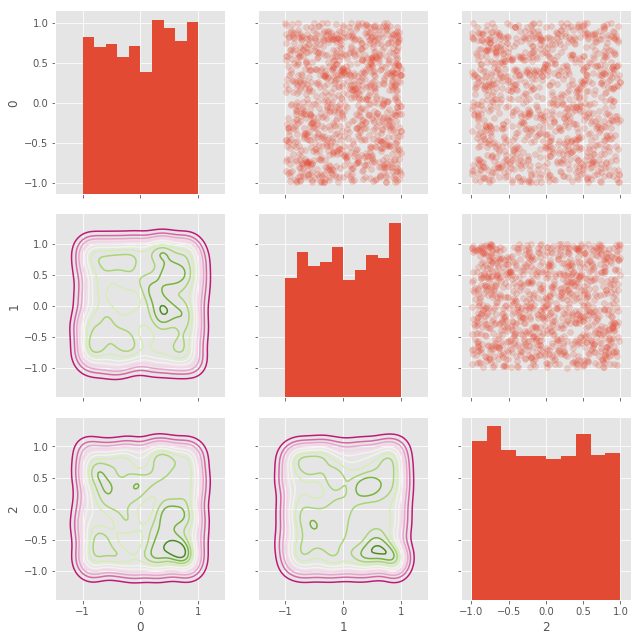

In [18]:
grid = sns.PairGrid(data = plot_data, size =3, diag_sharey = False)
# 上三角形半部為 scatter
grid.map_upper(plt.scatter, alpha = 0.2)
# 對角線畫 hist
grid.map_diag(plt.hist)
# 下半部放 density plot 
grid.map_lower(sns.kdeplot, cmap = plt.cm.PiYG)
plt.show()

3. 請用 numpy 建立一個 1000 x 3, 數值分布為常態分佈的矩陣，並繪製 PairPlot (上半部為 scatter, 對角線為 hist, 下半部為 density)

In [20]:
df3 = np.random.randn(1000,3)
# 隨機給予 0, 1, 2 三種標籤
indice = np.random.choice([0,1,2], size=1000)
plot_data2 = pd.DataFrame(df3, indice)

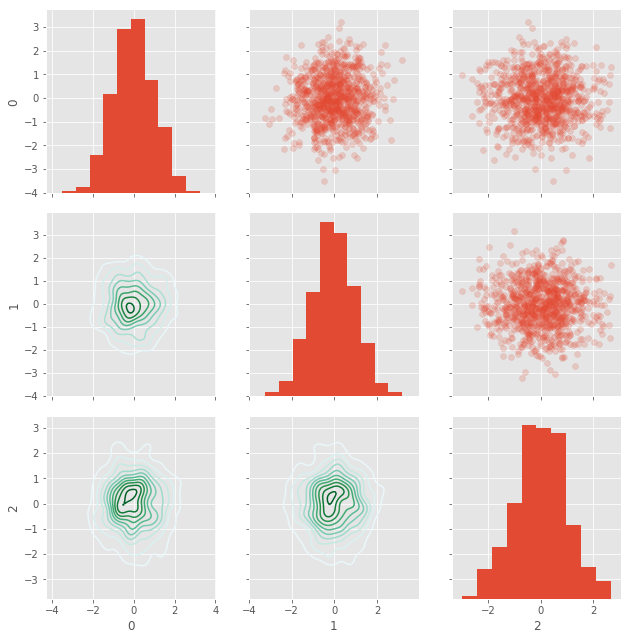

In [29]:
grid = sns.PairGrid(data = plot_data2, size =3, diag_sharey = False)
# 上三角形半部為 scatter
grid.map_upper(plt.scatter, alpha = 0.2)
# 對角線畫 hist
grid.map_diag(plt.hist)
# 下半部放 density plot 
grid.map_lower(sns.kdeplot, cmap = plt.cm.BuGn)
plt.show()